# Abalone Case Study

Problem Statement:

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

# Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict.

Name / Data Type / Measurement Unit / Description

Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years.

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score # model selection

from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset:

In [2]:
df=pd.read_csv('Abalone_Case.csv')
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# EDA:

In [3]:
df.sample(8)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
187,F,0.630,0.500,0.185,1.3830,0.5400,0.3315,0.380,10
1349,M,0.590,0.455,0.155,0.8855,0.3880,0.1880,0.275,10
2910,M,0.580,0.445,0.150,0.9525,0.4315,0.1945,0.287,11
3578,F,0.600,0.475,0.170,1.0880,0.4905,0.2475,0.310,10
2782,M,0.600,0.480,0.090,1.0500,0.4570,0.2685,0.280,8
17,F,0.440,0.340,0.100,0.4510,0.1880,0.0870,0.130,10
3472,I,0.165,0.120,0.050,0.0210,0.0075,0.0045,0.014,3
3256,F,0.575,0.480,0.150,0.8745,0.3750,0.1930,0.290,12


In [4]:
df.tail(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [5]:
df.head(6)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [6]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

The independent columns are in float data format but only gender column is object type and rings(age) which is our target column is integer data type.

In [7]:
df=pd.DataFrame(data=df)
df                           #converting dataset into dataframe to give it a structural format

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [8]:
df.shape

(4177, 9)

In [9]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

# About the Columns:

1.Gender: Gender of the species, either M/F.

2.length: The measurement or extent of something from end to end.

3.Diameter: A straight line that runs from one side of a figure and passes through the center Measure the diameter of the circle.

4.Height: The measurement of someone or something from head to foot or from base to top.

5.Whole weight: The weight of a person or thing is how heavy they are, measured in units such as kilograms, pounds, or tons.

6.Shucked weight: Shucked weight is supposed to be the weight without the shell.

7.Viscera weight: Visceral fat is fat that wraps around your abdominal organs deep inside your body.

8.Shell weight: Shell weight means that it's primarily a windproof, possibly waterproof shell that is intended to be worn over warmer clothes in cold weather, or by itself in warmer climates.

9.Rings: a small circular band, typically of precious metal and often set with one or more gemstones, worn on a finger as an ornament or a token of marriage, engagement, or authority.

Using problem statement, converting rings to Age.

# Checking null values:

In [10]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

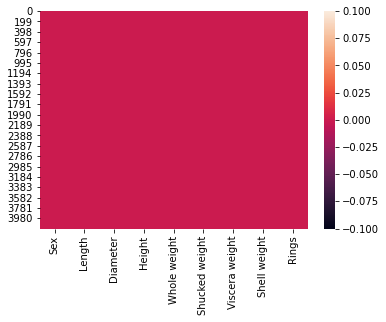

In [11]:
sns.heatmap(df.isnull())

There are no null values in our dataset from above observations.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [13]:
df['Sex'].value_counts()           


# As we can see the count of Male, Female and Infant as 1528, 1342 and 1307 respectively

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

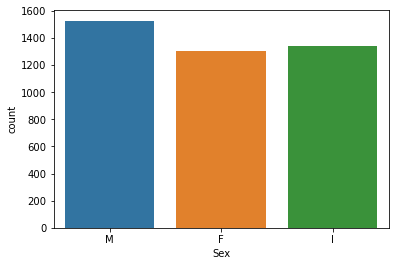

In [14]:
sns.countplot(df['Sex'])                       

# The countplot shows the above figures in the Graphical form and giving the counts of Male, Female and Infant

In [15]:
df['Sex']

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

# changing the object values into ineger using label encoder:

In [16]:
le=LabelEncoder()
df['gender']=le.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,gender
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0


The Sex column, F is replaced by 0 and M is replaced by 2 and I is replaced by 1.

# Describing Dataset:

In [17]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,gender
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,1.052909
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.822240
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,1.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,2.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,2.000000


Key obervations:



The mean is almost same as median (50th percentile) in all columns there is a more diff in 75% percentile and max in length,diameter, height,whole weight,shucked weight,viscera weight, shell weight and rings also. it suggest that there are outliers present in these columns.

# Describing dataset with heatmap:

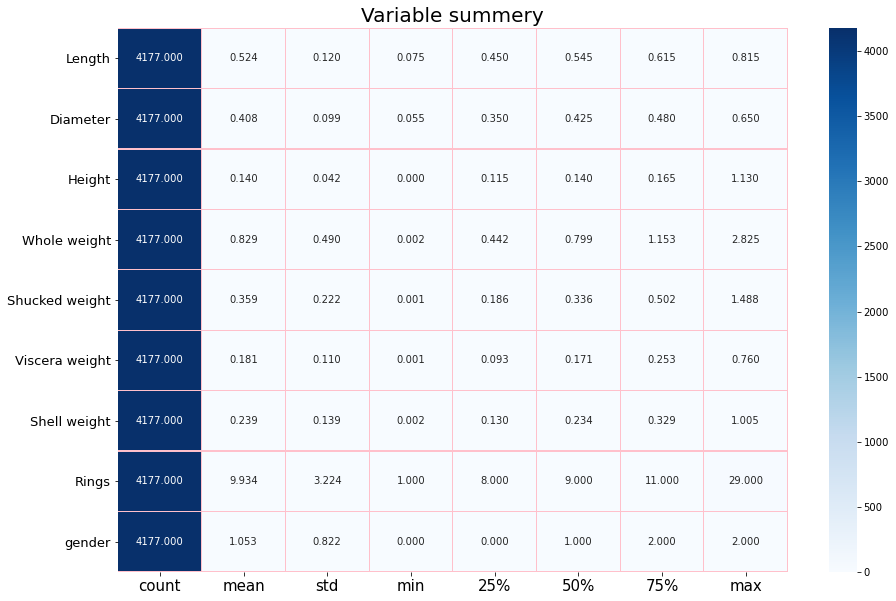

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df.describe().transpose(),annot=True,fmt='.3f',linewidth=0.1,cmap='Blues',linecolor='pink')
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.title('Variable summery', fontsize=20)
plt.show()

Outcome of describe of datasets: From above we are determining mean, standard deviation, min. and max. value of each column, which will furthur help us in data cleaning.

Total number of rows and columns in dataset:

4177 rows

9 columns

Length:

    1.Mean=0.524
    2.std=0.12
    3.max_value=0.815
    4.min_value=0.075

diameter:

    1.Mean=0.408
    2.std=0.099
    3.max_value=0.650
    4.min_value=0.055

height:

    1.Mean=0.140
    2.std=0.042
    3.max_value=1.130
    4.min_value=0.000

whole weight:

    1.Mean=0.829
    2.std=0.490
    3.max_value=2.825
    4.min_value=0.002

shucked weight:

    1.Mean=0.359
    2.std=0.222
    3.max_value=1.488
    4.min_value=0.001

viscera weight:

    1.Mean=0.181
    2.std=0.110
    3.max_value=0.760
    4.min_value=0.001

shell weight:

    1.Mean=0.239
    2.std=0.139
    3.max_value=1.005
    4.min_value=0.002

rings(age):

    1.Mean=9.934
    2.std=3.224
    3.max_value=29.000
    4.min_value=1.000


rings(age) is our target column.

# Checking correlation:

In [19]:
# Gives the Correlation Matrix of the Independent Variables with the Target Variable 

df_corr=df.corr()
df_corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,gender
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,-0.036066
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,-0.038874
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,-0.042077
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,-0.021391
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,-0.001373
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,-0.032067
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,-0.034854
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,-0.034627
gender,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

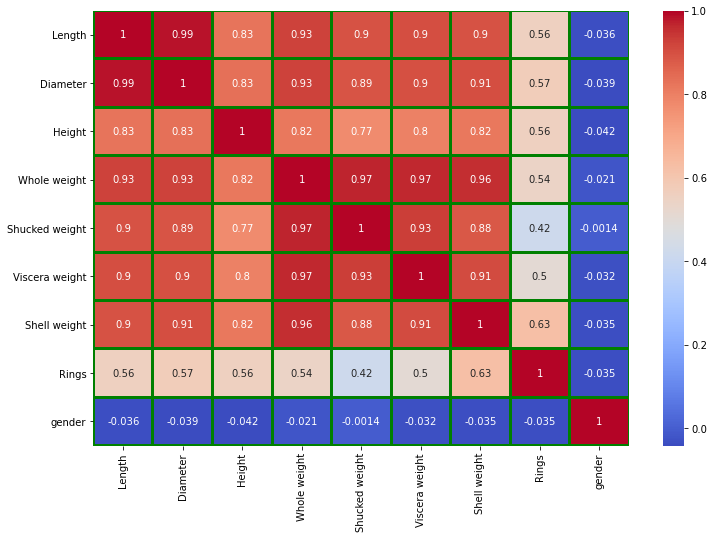

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr,annot=True,linewidths=2,linecolor='green',cmap='coolwarm')
plt.show

# Outcome of Correlation:

All the columns are almost positively correlated with the target column excluding gender.

shell weight is having 63 percent correlation with target column which can be considered as strong bond.

length, diameter, height and whole weight has 56, 57, 56 and 54 percent correlation with target column which we can consider as strong bond.

viscera weight and shucked weight has 50% and 42% correlation with target column and can be considered as strong bond with target column.

Max correlation: shell weight

Min correlation: gender

# Outlier Detection:

In [21]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'gender'],
      dtype='object')

In [22]:
#univariate analysis

<AxesSubplot:>

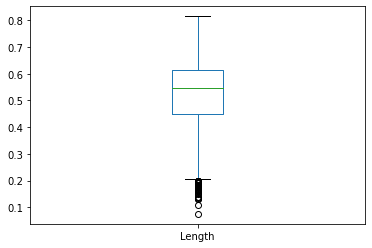

In [23]:
df['Length'].plot.box()

there are many outliers present int his column.

<AxesSubplot:>

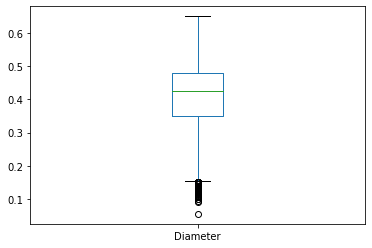

In [24]:
df['Diameter'].plot.box()

there are outliers in this variable also.

<AxesSubplot:>

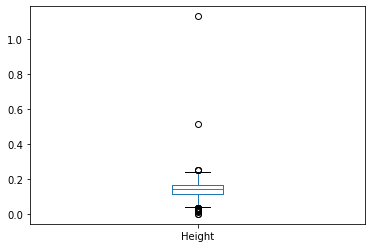

In [25]:
df['Height'].plot.box()

The height column also we can see few outliers.

<AxesSubplot:>

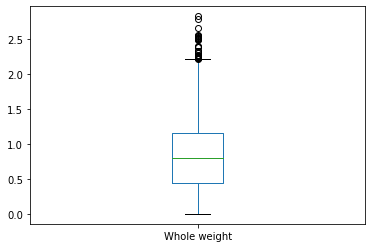

In [26]:
df['Whole weight'].plot.box()

outliers are present

<AxesSubplot:>

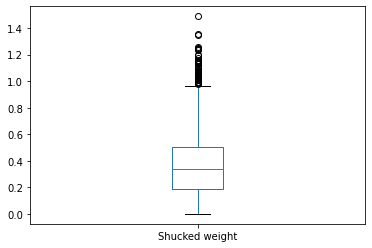

In [27]:
df['Shucked weight'].plot.box()

The outliers are present in this variable.

<AxesSubplot:>

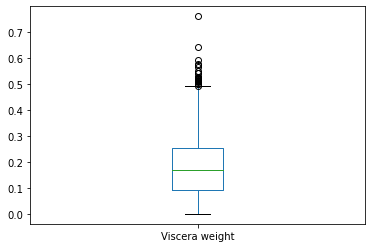

In [28]:
df['Viscera weight'].plot.box()

The outliers are present in this variable.

<AxesSubplot:>

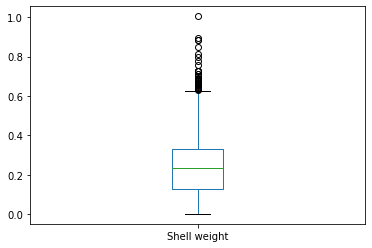

In [29]:
df['Shell weight'].plot.box()

The outliers are present in this variable.

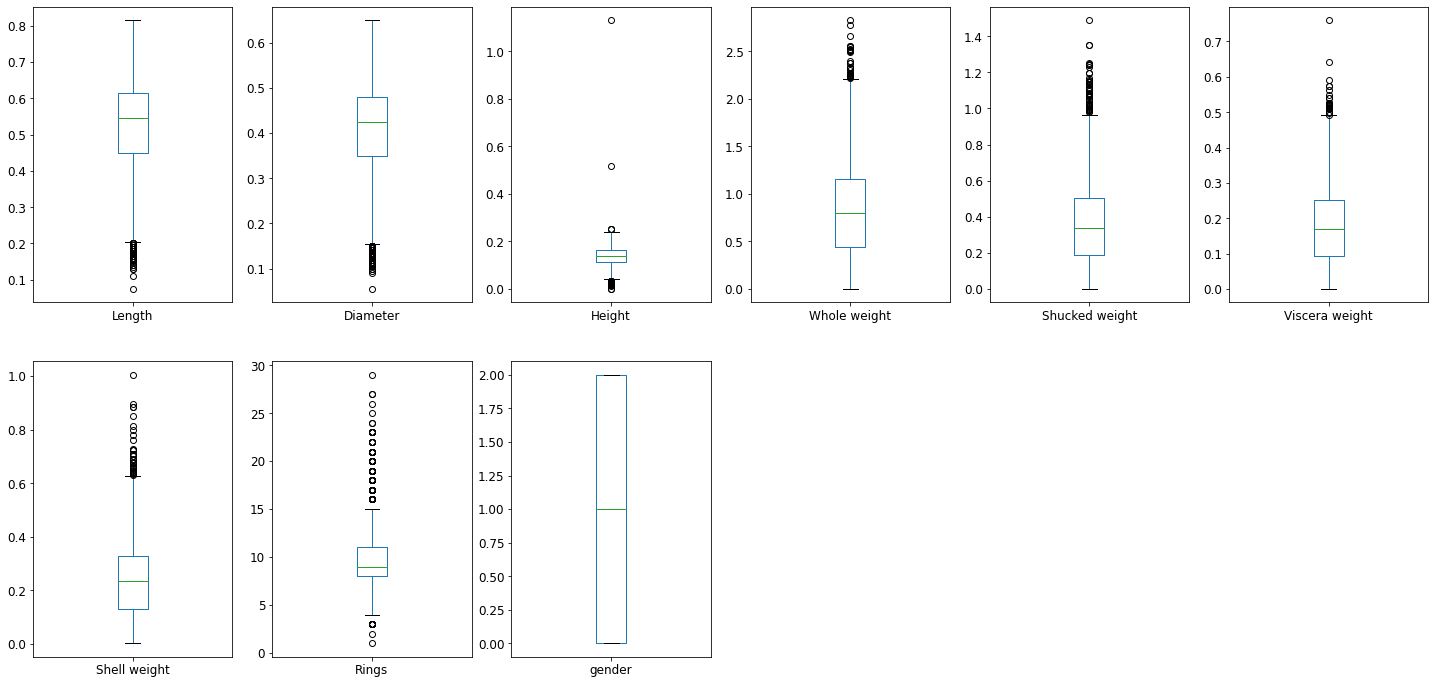

In [30]:
# The Subplot shows boxplots of all the variable at once without passing boxplot function individually for each variable

df.plot(kind='box',subplots=True, layout=(4,6),figsize=(25,25),fontsize=12)
plt.show()

from above observation we can see that except gender, there are outliers present in all the columns.

# Checking distribution skewness:

In [31]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
gender           -0.098155
dtype: float64

The all variables are highly skewed and needs to be treated.

<AxesSubplot:xlabel='Length', ylabel='Density'>

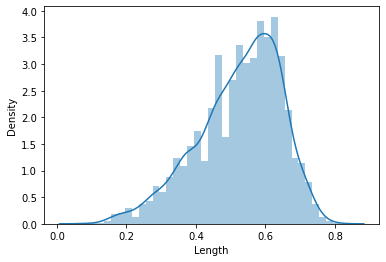

In [32]:
sns.distplot(df["Length"])

# The distribution plot shows that data in "Length" is skewed

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

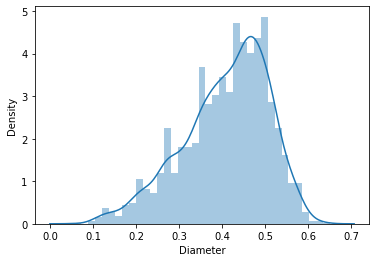

In [33]:
sns.distplot(df["Diameter"])

# The distribution plot shows that data in "Diameter" is skewed

<AxesSubplot:xlabel='Height', ylabel='Density'>

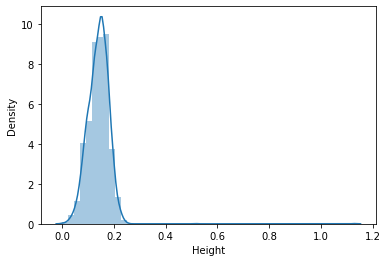

In [34]:
sns.distplot(df["Height"])

# The distribution plot shows that data in "Height" is very high skewed

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

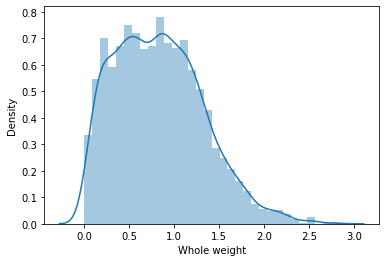

In [35]:
sns.distplot(df["Whole weight"])

# The distribution plot shows that data in "Whole Weight" is little right skewed


<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

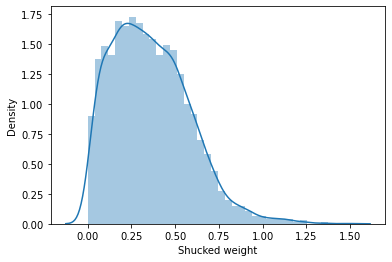

In [36]:
sns.distplot(df["Shucked weight"])

# The distribution plot shows that data in "Shucked Weight" is right skewed

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

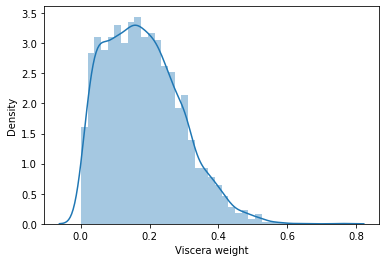

In [37]:
sns.distplot(df["Viscera weight"])

# The distribution plot shows that data in "Viscera Weight" is right skewed

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

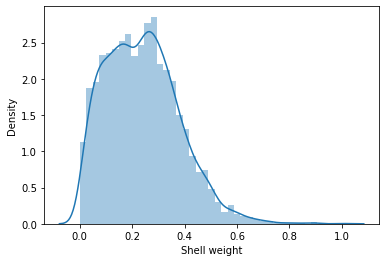

In [38]:
sns.distplot(df["Shell weight"])
# The distribution plot shows that data in "Shell Weight" is right skewed

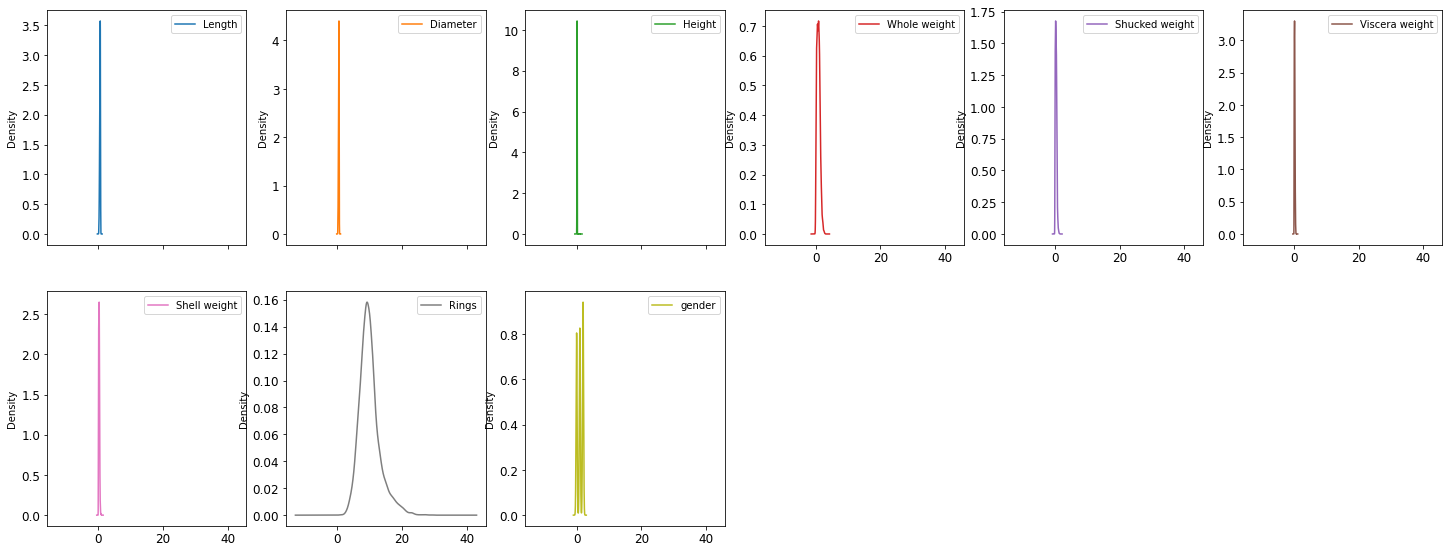

In [39]:
df.plot(kind="kde", subplots=True, layout=(5,6), figsize=(25,25), fontsize=12)
plt.show()

# It shows the subplot of all the Density of distribution plots

# Mutlivariate analysis:

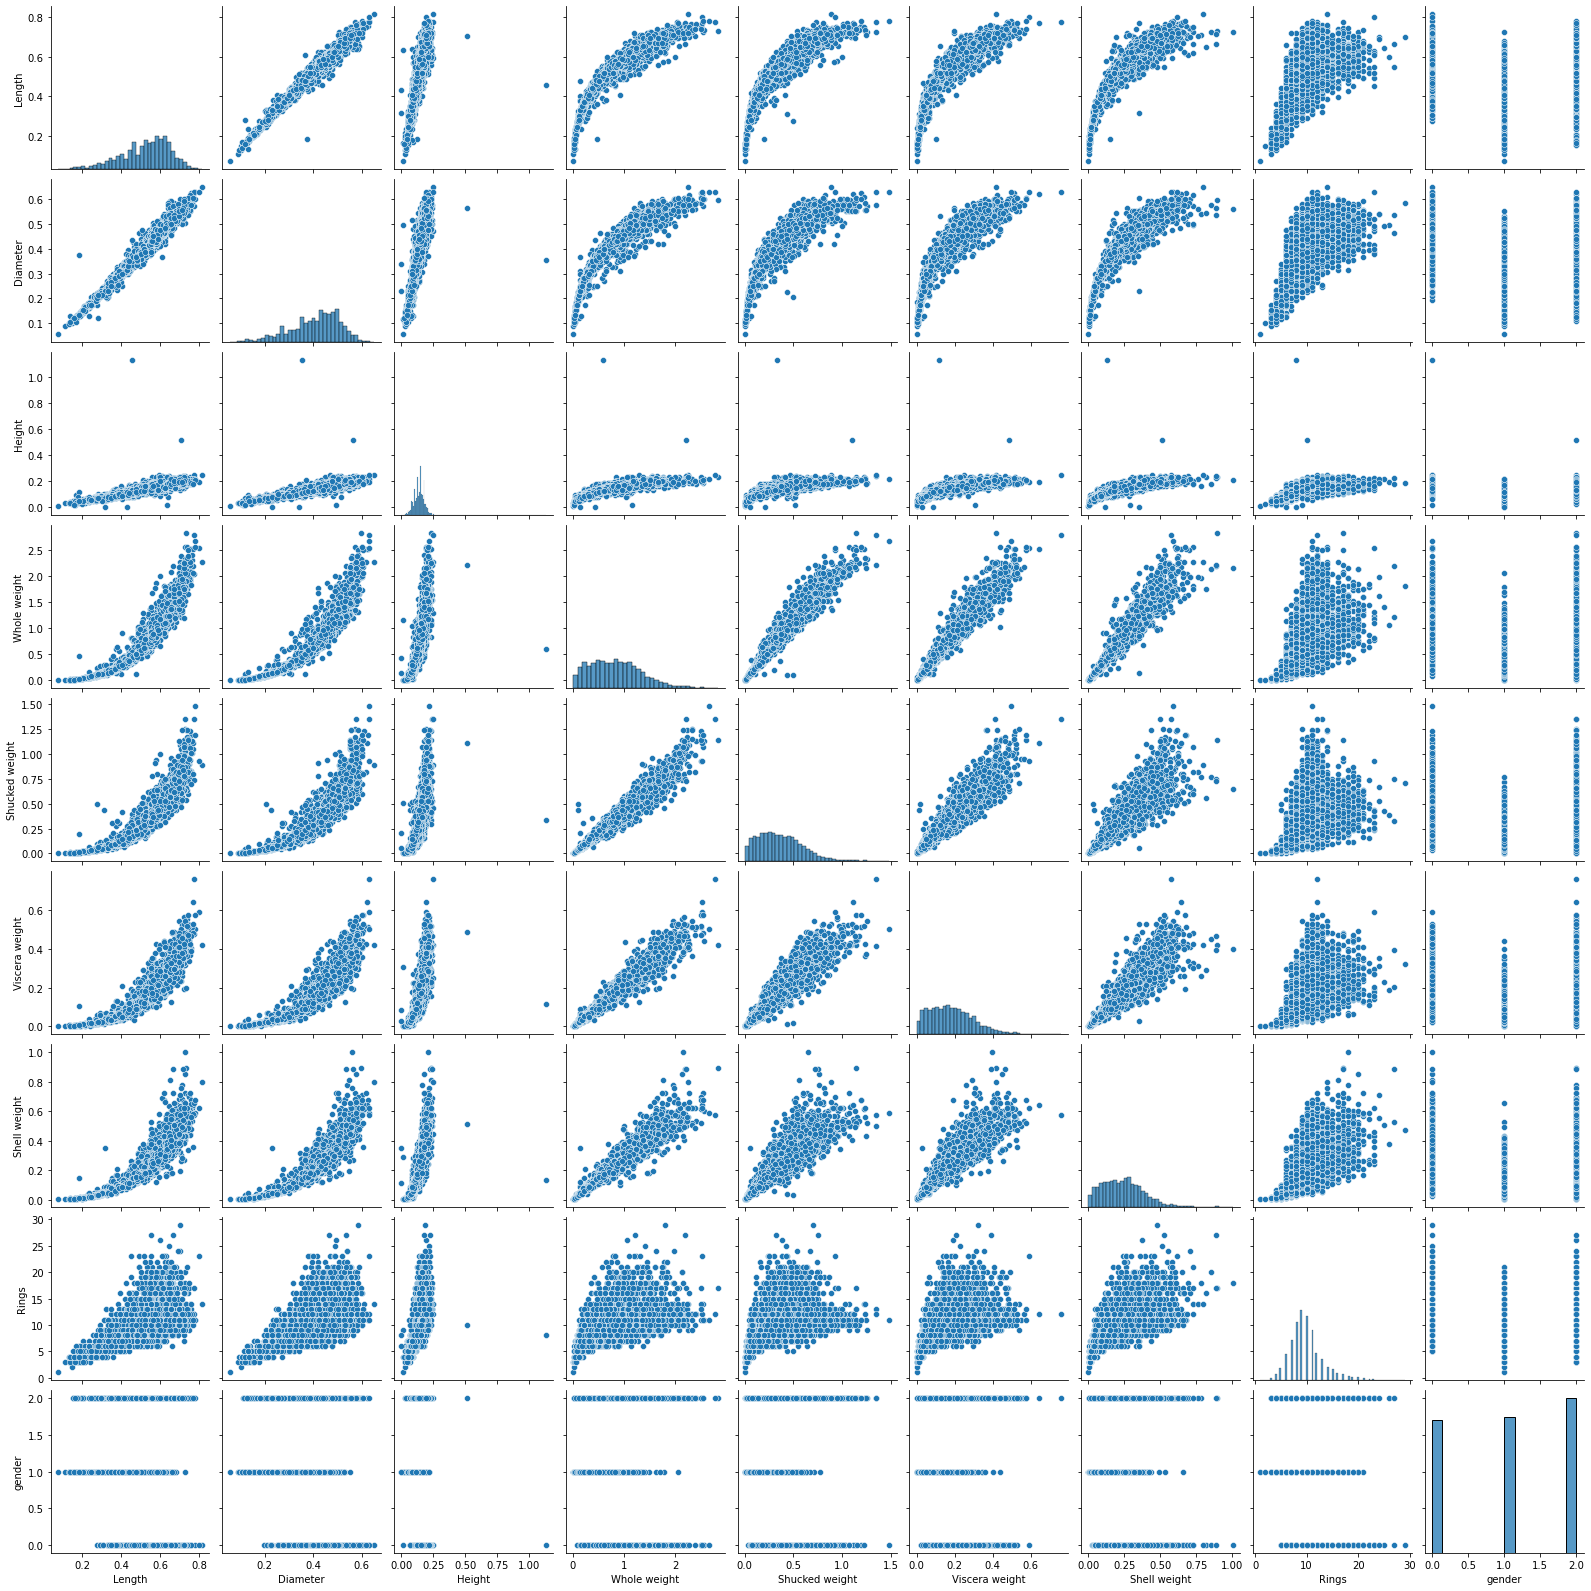

In [41]:
sns.pairplot(df)

# It is showing the correlation of each variable with others in graphical presentation

# Outlier Treatment:

In [42]:
from scipy.stats import zscore

In [43]:
df.drop(columns="Sex",inplace=True)

# We will first drop the "Sex" variable as it is an object type

In [44]:
z=np.abs(zscore(df))
z.shape

(4177, 9)

In [45]:
#We are taking threshold=3
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

This is displaying all the rows and columns where the value is above +3 Standard Deviation These are all the index locations of the outliers present in the dataset.

In [46]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(4177, 9)
(4027, 9)


In [47]:
df.shape                 #shape of dataset with outliers

(4177, 9)

In [48]:
df_new.shape           #shape of nw dataset without outliers

(4027, 9)

In [49]:
df_new

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,gender
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0


The Picking all the Dataset with zscore of Standard Deviation 3 or less and assigning it to new variable "df_new".

# Percentage data loss:

In [50]:
Data_loss=((4177-4027)/4177)*100
Data_loss

3.5910940866650707

Percentage loss is not more than 5 percent.

# Skewness removal:

splitting the independent and target variable in x and y before removing skewness

In [51]:
x=df_new.iloc[:,:-1]
x                         #taking all independent variable into x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [52]:
y=df_new.iloc[:,-1]
y                            #taking dependent variable into y

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: gender, Length: 4027, dtype: int32

In [53]:
x.skew()

# Checking the skewness of all independent variables
# few columns are skewed, Normal Range = +0.5 to -0.5

Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

In [54]:
from sklearn.preprocessing import power_transform

# Importing the power_transform function to reduce the over skewness in dataset

In [55]:
x_new=power_transform(x)
df_new=pd.DataFrame(x_new,columns=x.columns)

# Applying power_transform function and making new data frame of modified skewness dataset

In [56]:
df_new.skew()
# New and improved skewness is what we are getting after applying power_transform function

Length           -0.082985
Diameter         -0.080956
Height           -0.015962
Whole weight     -0.016797
Shucked weight    0.021815
Viscera weight    0.035902
Shell weight      0.016660
Rings             0.004745
dtype: float64

In [57]:
x=df_new 

# Saving the df_new variable in x as it contains the transformed data

In [58]:
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.684451,-0.543379,-1.158933,-0.575135,-0.540865,-0.688032,-0.586354,1.673028
1,-1.411739,-1.401132,-1.280406,-1.354050,-1.311318,-1.332854,-1.332717,-0.978127
2,-0.046219,0.037163,-0.128305,-0.184498,-0.362705,-0.240373,-0.080214,-0.159439
3,-0.799651,-0.543379,-0.395963,-0.570150,-0.592261,-0.539936,-0.542533,0.200092
4,-1.530577,-1.474343,-1.518600,-1.414577,-1.378735,-1.451548,-1.482926,-0.978127
...,...,...,...,...,...,...,...,...
4022,0.289495,0.390420,0.716250,0.277874,0.217107,0.690782,0.227258,0.533589
4023,0.545081,0.269661,-0.128305,0.441584,0.534924,0.474179,0.314936,0.200092
4024,0.651129,0.705921,1.943633,0.853434,0.901897,1.089651,0.663632,-0.159439
4025,0.926064,0.837713,0.286070,0.697385,0.924153,0.876428,0.577520,0.200092


In [59]:
y

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: gender, Length: 4027, dtype: int32

In [60]:
x.shape

(4027, 8)

In [61]:
y.shape

(4027,)

# Applying standard scaler:

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.68445079, -0.54337947, -1.15893308, ..., -0.68803217,
        -0.58635376,  1.67302767],
       [-1.4117394 , -1.40113174, -1.28040611, ..., -1.33285416,
        -1.33271691, -0.97812692],
       [-0.0462191 ,  0.03716259, -0.12830502, ..., -0.24037305,
        -0.08021413, -0.15943946],
       ...,
       [ 0.65112915,  0.70592133,  1.94363286, ...,  1.08965131,
         0.66363183, -0.15943946],
       [ 0.92606411,  0.8377131 ,  0.28606972, ...,  0.87642835,
         0.57752029,  0.20009181],
       [ 1.9719402 ,  1.85550496,  1.62558351, ...,  1.73214622,
         1.85675543,  0.84488768]])

In [63]:
y.value_counts()

2    1456
1    1322
0    1249
Name: gender, dtype: int64

In [64]:
print(x.shape)
print(y.shape)

(4027, 8)
(4027,)


# Model Building:

Finding best random state

In [65]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    train_score=lr.score(x_train,y_train)
    test_score=lr.score(x_test,y_test)
    acc= r2_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('max score:',maxacc*100,'\nmax random state:',maxrs,'\ntrain score:',train_score*100,'\ntest score:',test_score*100)

max score: 1.9581853125134274 
max random state: 68 
train score: 0.999407450769807 
test score: 1.1998630815601041


In [66]:
# train test split for best random state

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=172)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3020, 8), (3020,), (1007, 8), (1007,))

# LinearRegression model:

In [67]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=r2_score(y_test,pred)
train_score=lr.score(x_train,y_train)
test_score=lr.score(x_test,y_test)
print('--------------------------Linear Regression------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')

--------------------------Linear Regression------------------

mean squared error :0.6536764462029622

model accuracy:1.68%
train score:0.87%
test score:1.68%


# Decision tree regressor model:

In [68]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
acc=r2_score(y_test,pred)
train_score=dtc.score(x_train,y_train)
test_score=dtc.score(x_test,y_test)
print('---------------------Decision Tree Regression-----------')
print(f'\nmean squared error : {mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy: {acc*100: .2f}%')
print(f'train score: {train_score*100:.2f}%')
print(f'test score: {test_score*100:.2f}%')

---------------------Decision Tree Regression-----------

mean squared error : 1.3098311817279047

model accuracy: -97.01%
train score: 100.00%
test score: -97.01%


# KNeighbors regressor model:

In [69]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
pred=knr.predict(x_test)
acc=r2_score(y_test,pred)
train_score=knr.score(x_train,y_train)
test_score=knr.score(x_test,y_test)
print('--------------------------KNeighbors Regressor------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')

--------------------------KNeighbors Regressor------------------

mean squared error :0.7800993048659384

model accuracy:-17.33%
train score:19.39%
test score:-17.33%


# Support Vector regressor model:

In [70]:
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
acc=r2_score(y_test,pred)
train_score=svr.score(x_train,y_train)
test_score=svr.score(x_test,y_test)
print('--------------------------Support Vector Regressor------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')

--------------------------Support Vector Regressor------------------

mean squared error :0.7027273717445027

model accuracy:-5.70%
train score:-1.92%
test score:-5.70%


# Random Forest regressor model:

In [71]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
acc=r2_score(y_test,pred)
train_score=rfr.score(x_train,y_train)
test_score=rfr.score(x_test,y_test)
print('--------------------------Random Forest Regressor------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')

--------------------------Random Forest Regressor------------------

mean squared error :0.6944223435948362

model accuracy:-4.45%
train score:85.00%
test score:-4.45%


# AdaBoost regressor model:

In [72]:
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
pred=abr.predict(x_test)
acc=r2_score(y_test,pred)
train_score=abr.score(x_train,y_train)
test_score=abr.score(x_test,y_test)
print('--------------------------AdaBoost Regressor------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')

--------------------------AdaBoost Regressor------------------

mean squared error :0.6619947451981495

model accuracy:0.43%
train score:1.51%
test score:0.43%


# Applying lasso and ridge:

In [73]:
lassocv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lassocv.fit(x_train,y_train)
alpha=lassocv.alpha_
print('alpha:',alpha)

lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
pred=lasso_reg.predict(x_test)
acc=r2_score(y_test,pred)
train_score=lasso_reg.score(x_train,y_train)
test_score=lasso_reg.score(x_test,y_test)
print('-----------lasso------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')

alpha: 2.6368682841004967e-05
-----------lasso------------------

mean squared error :0.6537076924597193

model accuracy:1.68%
train score:0.87%
test score:1.68%


In [74]:
ridcv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridcv.fit(x_train,y_train)
alpha=ridcv.alpha_
print('alpha:',alpha)

rid_reg=Ridge(alpha)
rid_reg.fit(x_train,y_train)
pred=rid_reg.predict(x_test)
acc=r2_score(y_test,pred)
train_score=rid_reg.score(x_train,y_train)
test_score=rid_reg.score(x_test,y_test)
print('-------------Ridge------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')

alpha: 0.020999999999999998
-------------Ridge------------------

mean squared error :0.6536771226508342

model accuracy:1.68%
train score:0.87%
test score:1.68%


# Appling cross validation:

In [75]:
# try to improve accuracy through cross validation  
m=[lr,dtc,knr,svr,rfr,abr,lasso_reg,rid_reg]           #scaled for other models for cross validation
for i in m:
    scr_=cross_val_score(i,x,y,cv=5)
    print('----------',i,'------------')
    print(f'cross validation score:{scr_.mean()*100:.2f}\n')

---------- LinearRegression() ------------
cross validation score:0.39

---------- DecisionTreeRegressor() ------------
cross validation score:-105.01

---------- KNeighborsRegressor() ------------
cross validation score:-20.05

---------- SVR() ------------
cross validation score:-8.29

---------- RandomForestRegressor() ------------
cross validation score:-7.52

---------- AdaBoostRegressor() ------------
cross validation score:0.16

---------- Lasso(alpha=2.6368682841004967e-05) ------------
cross validation score:0.39

---------- Ridge(alpha=0.020999999999999998) ------------
cross validation score:0.39



# Hyperparameter Tuning:

SVR model has the least differnce

In [76]:
#creating parameter list to pass in GridSearchCV

parameters={'kernel':['linear','poly','sigmoid'],
           'gamma':['scale','auto','float']}


# Setting the Parameters to apply to GridSearchCV to get the best parameter score

In [77]:
GCV=GridSearchCV(SVR(),parameters,cv=5,scoring="accuracy")

GCV.fit(x_train,y_train)         #fitting data in model

GCV.best_params_                 #Printing the best parameters found by GridSearchCV

{'gamma': 'scale', 'kernel': 'linear'}

# Direct applying best estimators:

In [78]:
svr=GCV.best_estimator_
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
acc=r2_score(y_test,pred)
train_score=svr.score(x_train,y_train)
test_score=svr.score(x_test,y_test)
print('--------------------------AdaBoost Regressor------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')

--------------------------AdaBoost Regressor------------------

mean squared error :0.6599598634545939

model accuracy:0.74%
train score:0.37%
test score:0.74%


Final Accuracy is 54.53%

# Saving the best model

In [79]:
import pickle
file="Abalon_case_Study.pkl"
pickle.dump(svr,open(file,'wb'))